# ***1. Foundational Knowledge:***
Understand the principles of Artificial Neural Networks (ANNs) and how they perform classification tasks.

**An Artificial Neural Network** is a computational model inspired by the way biological neural networks (like the brain) work. It consists of interconnected units called neurons or nodes organized in layers.

Key Components:

**Input layer:** Takes the input features.

**Hidden layers:** Intermediate layers that process information.

**Output layer:**Produces the final output (e.g., classification result).

How Does an ANN Work?
Each neuron in a layer receives inputs, multiplies them by weights, adds a bias, applies an activation function, and passes the result to the next layer.

Mathematically:

𝑧
=
∑
𝑖
=
1
𝑛
𝑤
𝑖
𝑥
𝑖
+
𝑏

Where:

𝑥
𝑖
  = input feature
𝑖


𝑤
𝑖
  = weight for feature
𝑖


𝑏
= bias term

𝑧 = weighted sum

Then,

𝑎
=
𝜎
(
𝑧
)

Where:

𝜎
 = activation function (e.g., sigmoid, ReLU)

𝑎
 = activation output passed to the next layer



Familiarize yourself with key components of a neural network: layers, activation functions, loss functions, optimizers.

# **Activation Functions**
Activation functions introduce non-linearity to the network, allowing it to learn complex patterns beyond simple linear relationships.

Why non-linearity?
Without activation functions, the network would behave like a linear regression model, regardless of depth, limiting its learning capacity.


Examples:
**Sigmoid**: Good for output layer in binary classification (gives probability).

**ReLU**: Most popular in hidden layers because it helps avoid vanishing gradients and speeds up training.

**Softmax**: Used in multi-class classification to convert raw scores into class probabilities.

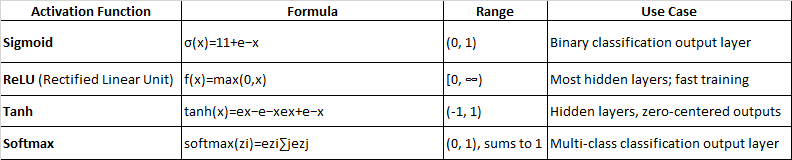

**Loss Functions**
The loss function measures how well the neural network’s predictions match the true targets during training. It quantifies the error.

The goal during training is to minimize this loss.

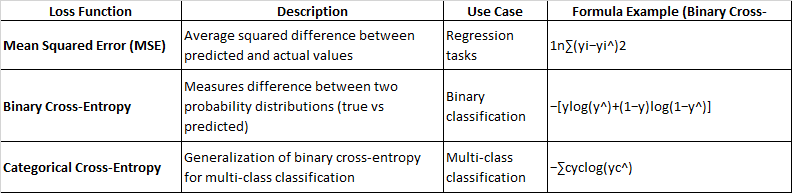

**Optimizers** are algorithms that adjust the network’s weights and biases to minimize the loss function during training.

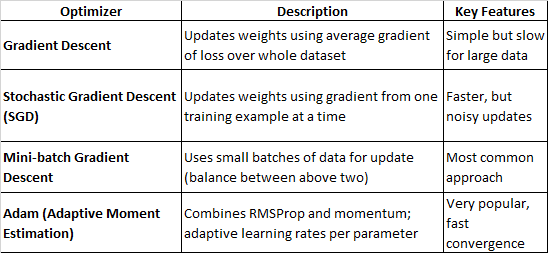

Recognize the impact of network architecture (number of layers, neurons), activation functions, and training hyperparameters on model performance.


**1. Network Architecture Impact**

Number of Layers (Depth)
More layers enable the network to learn more complex and abstract features from data.

Too few layers → underfitting (model too simple to capture patterns).

Too many layers → training challenges (vanishing gradients), longer training times, and risk of overfitting if data is insufficient.

Number of Neurons per Layer (Width)
More neurons increase model capacity and expressiveness.

Too few neurons → model can’t capture complexity, leading to underfitting.

Too many neurons → model might memorize training data and overfit, reducing generalization.


**2. Activation Functions Impact**

Activation functions introduce non-linearity, crucial for learning complex patterns.

Common choices:

ReLU: Fast convergence, widely used in hidden layers.

Sigmoid: Good for binary classification output, but can cause vanishing gradients in hidden layers.

Tanh: Zero-centered, better than sigmoid but still prone to vanishing gradients.

Softmax: Converts outputs into class probabilities for multi-class classification.

Choosing the wrong activation can slow training or limit model capacity.



**3. Training Hyperparameters Impact**

Learning Rate: Controls step size in weight updates.

Too high → unstable training, loss may not decrease.

Too low → slow convergence, possibly stuck in local minima.

Batch Size: Number of samples per gradient update.

Smaller batches add noise, which can help generalization.

Larger batches provide stable gradients but need more memory.

Number of Epochs: More epochs allow better learning but increase overfitting risk if too many.

Optimizer: Algorithms like Adam, SGD affect speed and stability of convergence.



# ***2. Data Exploration:***
Analyze the dataset's structure and characteristics using exploratory techniques such as histograms, scatter plots, correlation matrices.

Understand the dataset's attributes to guide the neural network modeling process.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('creditcard.csv')



In [6]:


# Check missing values
print(df.isnull().sum().any())

False


In [4]:
df.dropna(inplace = True)

In [8]:
df.duplicated().sum().any()

np.False_

In [7]:
df.drop_duplicates(inplace = True)

In [10]:
# Basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 57291 entries, 0 to 57529
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57291 non-null  int64  
 1   V1      57291 non-null  float64
 2   V2      57291 non-null  float64
 3   V3      57291 non-null  float64
 4   V4      57291 non-null  float64
 5   V5      57291 non-null  float64
 6   V6      57291 non-null  float64
 7   V7      57291 non-null  float64
 8   V8      57291 non-null  float64
 9   V9      57291 non-null  float64
 10  V10     57291 non-null  float64
 11  V11     57291 non-null  float64
 12  V12     57291 non-null  float64
 13  V13     57291 non-null  float64
 14  V14     57291 non-null  float64
 15  V15     57291 non-null  float64
 16  V16     57291 non-null  float64
 17  V17     57291 non-null  float64
 18  V18     57291 non-null  float64
 19  V19     57291 non-null  float64
 20  V20     57291 non-null  float64
 21  V21     57291 non-null  float64
 22  V22

Target Variable Distribution:
Class
0.0    57132
1.0      159
Name: count, dtype: int64

Fraud cases (1): 159 (0.28%)
Normal cases (0): 57132 (99.72%)


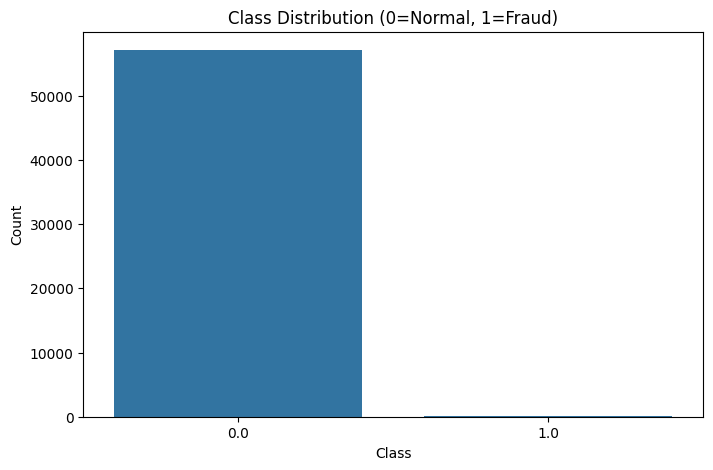

In [11]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Check target variable distribution
class_counts = df['Class'].value_counts()
print("Target Variable Distribution:")
print(class_counts)
print(f"\nFraud cases (1): {class_counts[1]} ({class_counts[1]/len(df)*100:.2f}%)")
print(f"Normal cases (0): {class_counts[0]} ({class_counts[0]/len(df)*100:.2f}%)")

# 2. Plot class distribution (fixed version)
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0=Normal, 1=Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

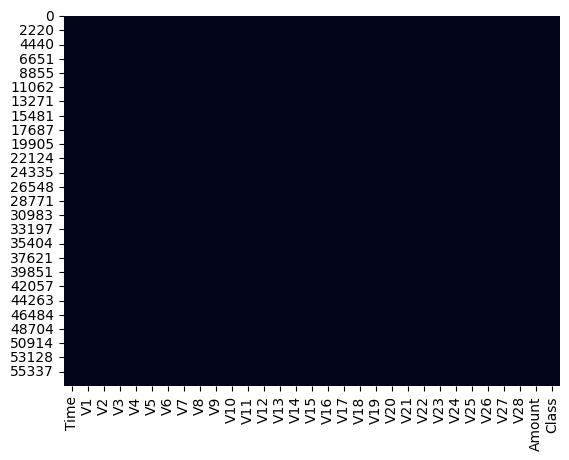

In [12]:
# Visualize missing values (if any)
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)
plt.show()

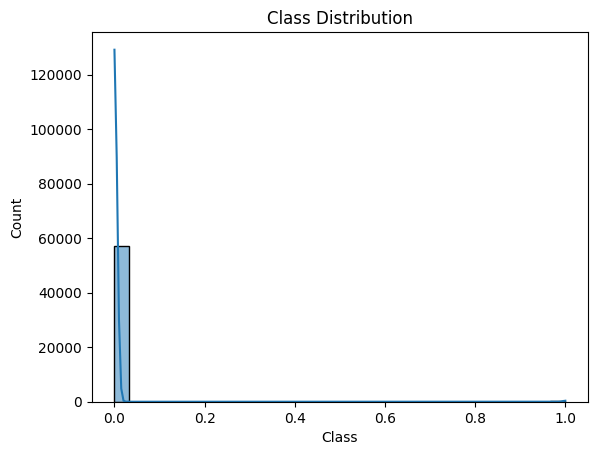

In [14]:
# Histogram - Age
sns.histplot(df['Class'], bins=30, kde=True)
plt.title('Class Distribution')
plt.show()


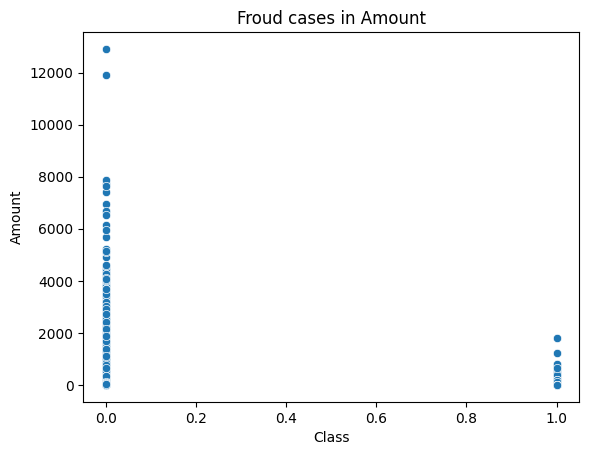

In [16]:
# Scatter plot - Credit limit vs Age
sns.scatterplot(x='Class', y='Amount', data=df)
plt.title('Froud cases in Amount')
plt.show()

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your dataset (make sure 'df' is already loaded)
# df = pd.read_csv("your_file.csv")  # if needed

# Separate features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



# **3. Preprocessing and Feature Engineering:**

Handle missing values and scale the features appropriately, as neural networks are sensitive to feature scales.


Encode categorical variables if necessary.

Split the dataset into training and testing sets.


Optionally, create validation sets for tuning.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


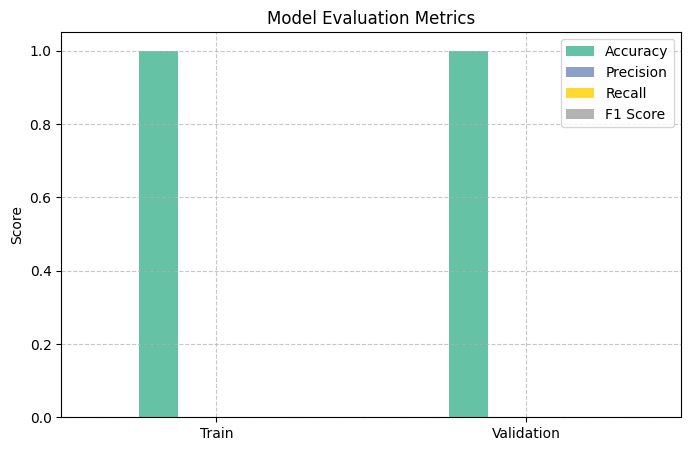

<ipython-input-14-8977c3907bc0>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_val_pred.flatten(), palette="pastel")


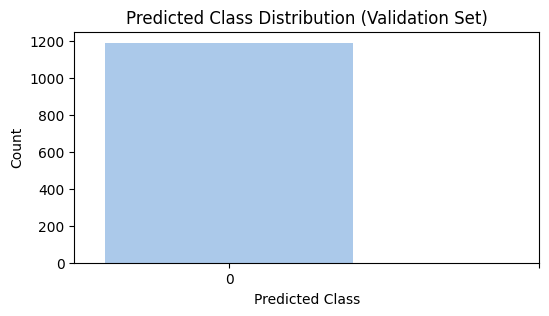

In [14]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Build ANN model
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


df_metrics = pd.DataFrame([train_metrics, val_metrics], index=["Train", "Validation"])
df_metrics.plot(kind="bar", figsize=(8, 5), colormap="Set2")
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Prediction distribution
plt.figure(figsize=(6,3))
sns.countplot(x=y_val_pred.flatten(), palette="pastel")
plt.title("Predicted Class Distribution (Validation Set)")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.xticks([0, 1])
plt.show()

# **4. Deep Learning Model Construction:**
Choose an appropriate model architecture: number of layers, neurons per layer, activation functions (e.g., ReLU, Sigmoid).


Compile the model with appropriate loss function (e.g., binary cross-entropy) and optimizer (e.g., Adam).


Train the model on the training data.


In [15]:

# Train
model.fit(X_train_scaled, y_train, epochs=10, batch_size=2048, verbose=1)

# Predict
y_train_pred = (model.predict(X_train_scaled) > 0.5).astype("int32")
y_val_pred = (model.predict(X_val_scaled) > 0.5).astype("int32")

# Evaluation
print("TRAIN RESULTS:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1 Score:", f1_score(y_train, y_train_pred))

print("\nVALIDATION RESULTS:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))

# Count how many 1s and how many correctly predicted
print("\nTRAIN SET: Actual 1s =", sum(y_train), " | Correctly Predicted 1s =", np.sum((y_train.values == 1) & (y_train_pred.flatten() == 1)))
print("VALIDATION SET: Actual 1s =", sum(y_val), " | Correctly Predicted 1s =", np.sum((y_val.values == 1) & (y_val_pred.flatten() == 1)))


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.0890 - loss: 1.1565
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.1740 - loss: 1.0316 
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2738 - loss: 0.9186
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4105 - loss: 0.8175 
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5629 - loss: 0.7352
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6891 - loss: 0.6582 
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7786 - loss: 0.5879 
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8522 - loss: 0.5292
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9066 - loss: 0.4795 
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9396 - loss: 0.4325 
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
TRAIN RESULTS:
Accuracy: 0.9576753000631711
Precision: 0.0
Recall: 0.0
F1 Score: 0

# **5. Model Evaluation:**
Evaluate the trained model using metrics such as accuracy, precision, recall, F1-score, AUC-ROC.


Use confusion matrices and ROC curves to assess model performance and analyze errors.


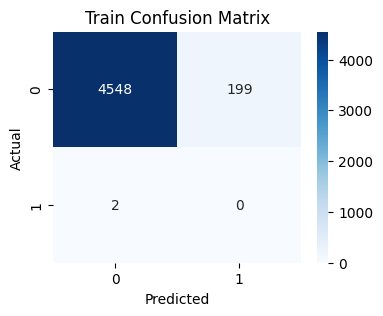

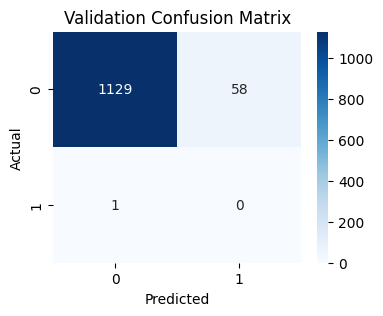

In [16]:

# Confusion Matrices
train_cm = confusion_matrix(y_train, y_train_pred)
val_cm = confusion_matrix(y_val, y_val_pred)

def plot_conf_matrix(cm, title):
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_conf_matrix(train_cm, "Train Confusion Matrix")
plot_conf_matrix(val_cm, "Validation Confusion Matrix")

# Metric bar chart
train_metrics = {
    "Accuracy": accuracy_score(y_train, y_train_pred),
    "Precision": precision_score(y_train, y_train_pred),
    "Recall": recall_score(y_train, y_train_pred),
    "F1 Score": f1_score(y_train, y_train_pred)
}
val_metrics = {
    "Accuracy": accuracy_score(y_val, y_val_pred),
    "Precision": precision_score(y_val, y_val_pred),
    "Recall": recall_score(y_val, y_val_pred),
    "F1 Score": f1_score(y_val, y_val_pred)
}

**ROC curve plots True Positive Rate (Recall) vs False Positive Rate at different classification thresholds.**


It shows how well your model can distinguish between classes.

Area Under the Curve (AUC) quantifies overall performance; 1.0 is perfect, 0.5 is random guessing.



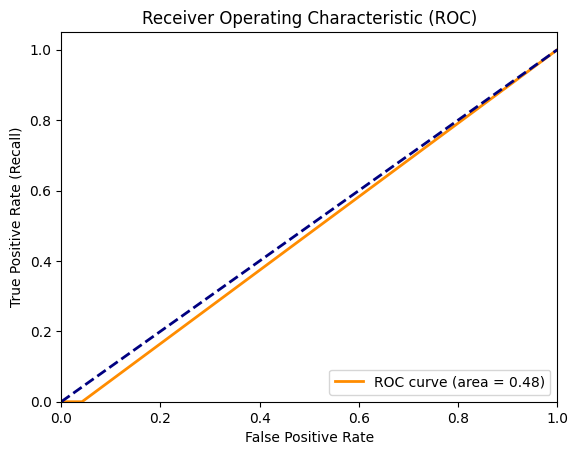

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_test: true labels
# y_scores: predicted probabilities of positive class from your model

fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# **6. Hyperparameter Tuning and Model Optimization:**

Perform hyperparameter tuning (e.g., number of layers, learning rate, batch size, epochs) to optimize model performance.


Validate the optimized model using cross-validation or validation sets.




**Hyperparameters** are the settings you choose before training a model, such as:

Number of layers in the neural network

Number of neurons in each layer

Learning rate (how fast the model learns)

Batch size (number of samples per training step)

Number of epochs (how many times the model sees the entire training data)

Activation functions, dropout rates, optimizer choice, etc.

 **Why tune hyperparameters?**

Because the choice of hyperparameters greatly affects:

Model accuracy

Training speed

Overfitting or underfitting behavior



**There are different methods:**

1. Manual search
Try different values by hand (slow and inefficient).

2. Grid Search
Try all combinations from a grid of hyperparameter values.

3. Random Search
Randomly sample combinations, often more efficient.

4. Bayesian Optimization, Hyperband, etc.
More advanced methods (libraries like Optuna, Ray Tune).

In [30]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define a function to create model, required for KerasClassifier
def create_model(learning_rate=0.001, num_neurons=32, dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap Keras model for use in scikit-learn
#model = KerasClassifier(build_fn=create_model, verbose=0)

# Define hyperparameters grid to search
param_grid = {
    'batch_size': [32, 64],
    'epochs': [10, 20],
    'learning_rate': [0.001, 0.01],
    'num_neurons': [32, 64],
    'dropout_rate': [0.0, 0.2]
}

# Grid search with 3-fold cross-validation
#grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=1)

# Fit grid search
#grid_result = grid.fit(X_train_processed, y_train)

# Print best parameters and best score
#print(f"Best Accuracy: {grid_result.best_score_:.4f} using {grid_result.best_params_}")


In [31]:
from sklearn.model_selection import train_test_split

# Split train into train+validation
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build your model with best params (from tuning)
model = create_model(learning_rate=0.001, num_neurons=64, dropout_rate=0.2)

# Train with validation data
history = model.fit(X_train_final, y_train_final, epochs=20, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7533 - loss: 37.4637 - val_accuracy: 1.0000 - val_loss: 6.9751e-05
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9989 - loss: 1.0938 - val_accuracy: 1.0000 - val_loss: 7.8687e-05
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9994 - loss: 0.4874 - val_accuracy: 1.0000 - val_loss: 9.5639e-05
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9996 - loss: 0.3313 - val_accuracy: 1.0000 - val_loss: 1.0651e-04
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9996 - loss: 0.2202 - val_accuracy: 1.0000 - val_loss: 1.4572e-04
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9994 - loss: 0.3975 - val_accuracy: 1.0000 - val_loss: 1.7115e-04
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9996 - loss: 0.2130 - val_accuracy: 1.0000 - val_loss: 2.0934e-04
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9999 - loss: 0.0381 - val_accuracy: 